## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

### Part 1: Analyzing Best-Seller Trends Across Product Categories

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r"C:\Users\Vanuhi\Downloads\archive\amz_uk_price_prediction_dataset.csv")
df = data.copy()

df.sample(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1504716,1679771,B0CC19PQBK,IQYU Men's Softshell Jacket Lightweight Hoodie...,0.0,0,23.41,False,0,Sports & Outdoors
963054,1055908,B0CGDDFTCT,Baiomawzh Women's Fleece Jacket with Hood Pola...,0.0,0,18.49,False,0,Sports & Outdoors
605076,652859,B0CDQ5512F,PENXZT Mountain Bike Shoes for Mens MTB Cyclin...,0.0,0,49.99,False,0,Cycling Shoes
1771843,1994365,B07C3M1XG5,"TSA Approved Toiletry Bag, Quart Size Travel T...",4.5,2777,11.99,False,0,Luggage and travel gear
1662084,1869195,B00BS5SY2C,Ecozone Coffee Machine Cleaner and Descaler 50...,4.4,5805,4.00,False,2000,Grocery


### 1.1 Crosstab Analysis

In [3]:
crosstab_cat_best = pd.crosstab(df['category'],df['isBestSeller'])

crosstab_cat_best

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
crosstab_cat_best = crosstab_cat_best.sort_values(by=True , ascending=False)
crosstab_cat_best

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Blank Media Cases & Wallets,243,0
Boating Footwear,140,0
Boxes & Organisers,911,0


### 1.2 Statistical Tests

In [5]:
# p-vaöue for Chi-square
_, chi_p, _, _ = chi2_contingency(crosstab_cat_best)
print(f'P-value of Chi-Square test is:{chi_p}')

# Craver's V
association(crosstab_cat_best, method='cramer')


P-value of Chi-Square test is:0.0


0.1222829439760564

### 1.3 Visualization

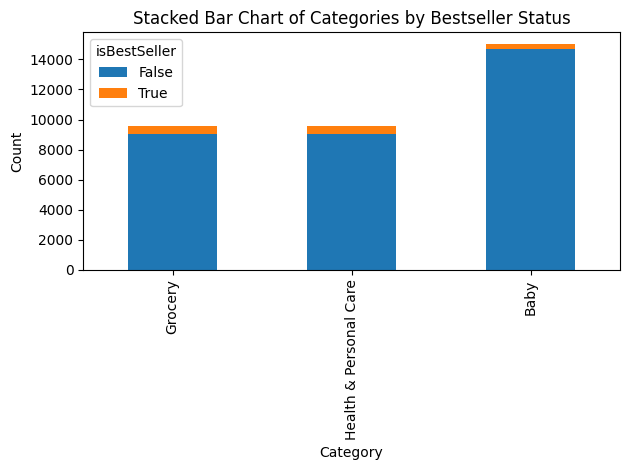

In [6]:
# Included only top 3 for visible outcome on stacked barplot
crosstab_cat_best.head(3).plot(kind='bar', stacked=True)

plt.title("Stacked Bar Chart of Categories by Bestseller Status")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)  # rotate x-axis labels for readability
plt.legend(title="isBestSeller")
plt.tight_layout()  # adjust layout to prevent clipping of labels
plt.show()

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

### 2.0 Preliminary Step: Remove Outliers in Product Prices

In [7]:
# sneakpick at outliers distribution
#  sns.boxplot(data=df['price'])
# plt.show()


# IQR method
# defining 1st and 3rd quantiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

# defining upper and lower bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['price'] <= upper_bound) & (df['price'] >= lower_bound)]
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### 2.1 Violin Plots

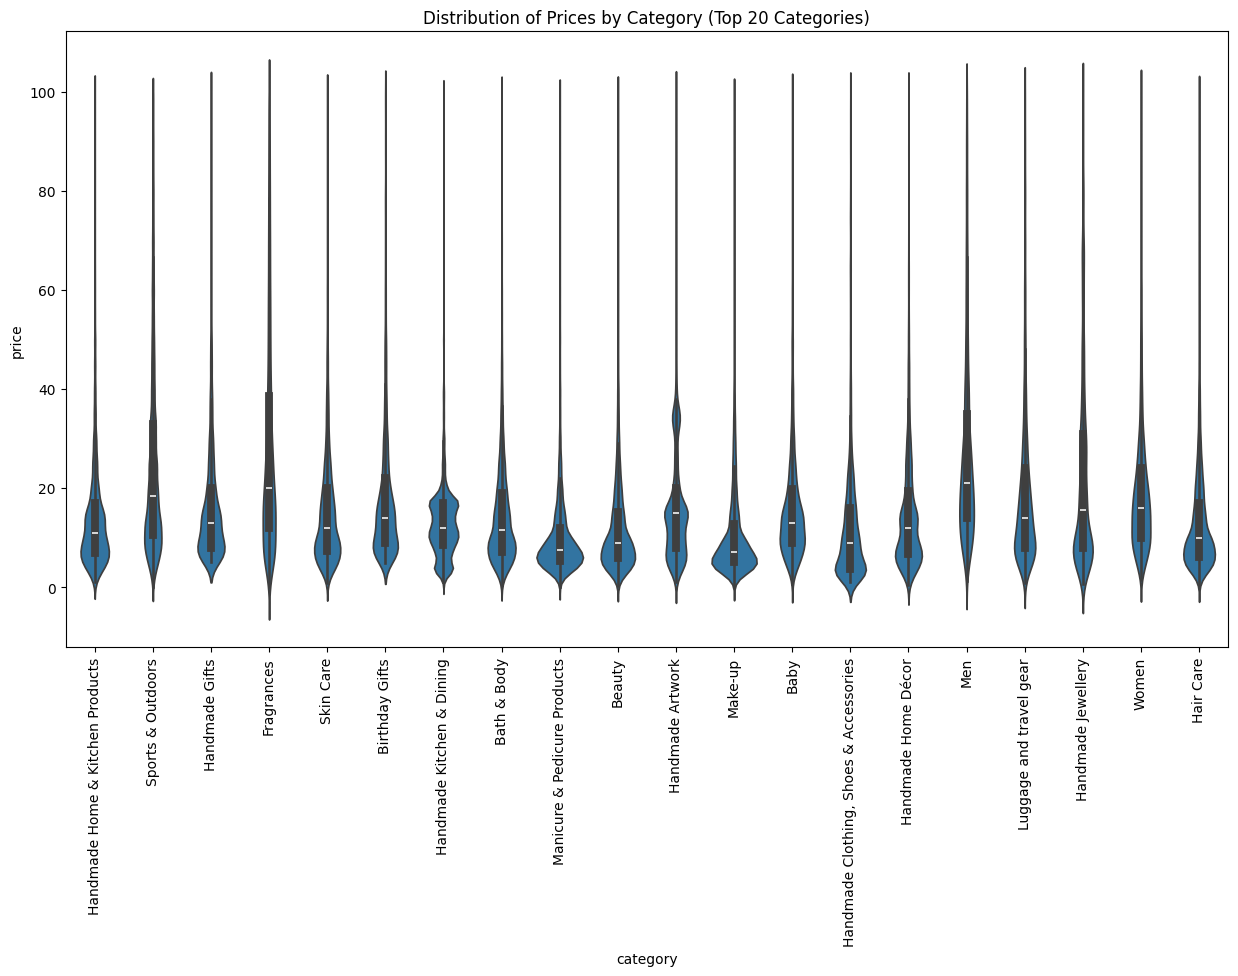

'Desktop PCs'

In [8]:
# identifying top 20 categories by count of price entries
top_categories = df['category'].value_counts().head(20).index

# filter the DataFrame to only include rows from these top categories
filtered_df = df[df['category'].isin(top_categories)]

# creating the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=filtered_df, x='category', y='price')
plt.xticks(rotation=90)  # rotating x-axis labels for better readability
plt.title("Distribution of Prices by Category (Top 20 Categories)")
plt.show()

# category with highest median price
df.groupby('category')['price'].median().idxmax()



### 2.2 Bar Charts

category
Bath & Body                               14.68
Beauty                                    12.52
Birthday Gifts                            18.60
Hair Care                                 13.46
Handmade Clothing, Shoes & Accessories    12.96
Handmade Gifts                            17.40
Make-up                                   10.61
Manicure & Pedicure Products              10.23
Skin Care                                 15.65
Sports & Outdoors                         25.17
Name: price, dtype: float64


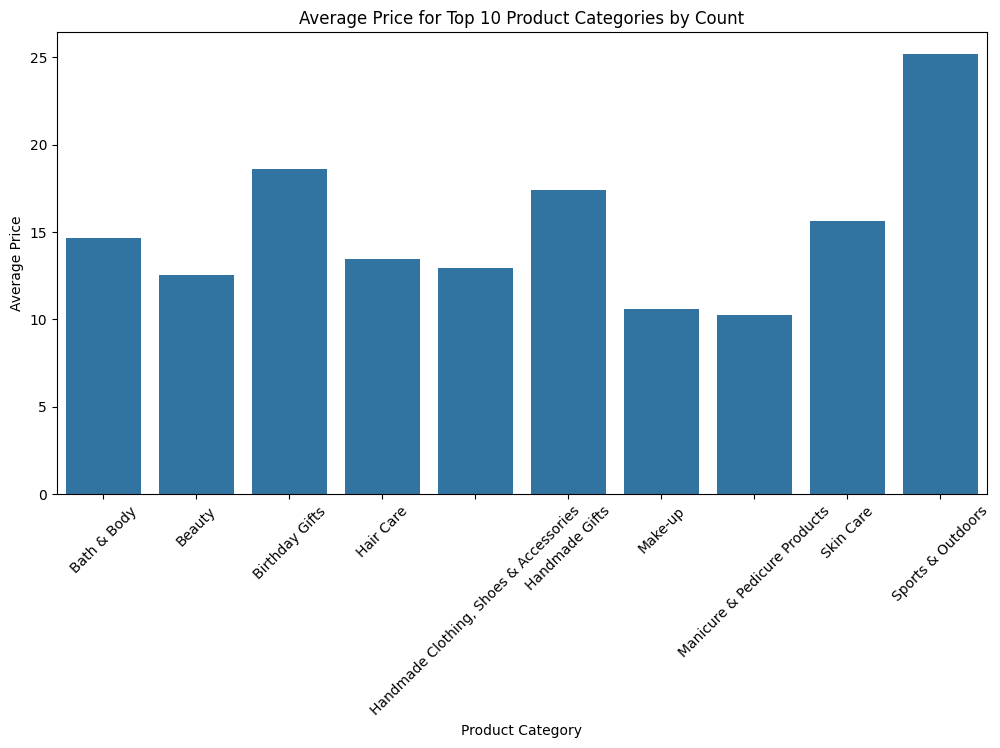

'Motherboards'

In [9]:
# top 10 categories based on count
top_categories = df['category'].value_counts().head(10).index

filtered_df1 = df[df['category'].isin(top_categories)]

# Group by category and calculate the average price for these top categories
avg_price_top = filtered_df1.groupby('category')['price'].mean().round(2)

print(avg_price_top)

# bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_top.index, y=avg_price_top.values)
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.title("Average Price for Top 10 Product Categories by Count")
plt.show()

# category with the highest average price
df.groupby('category')['price'].mean().idxmax()


### 2.3 Boxplot

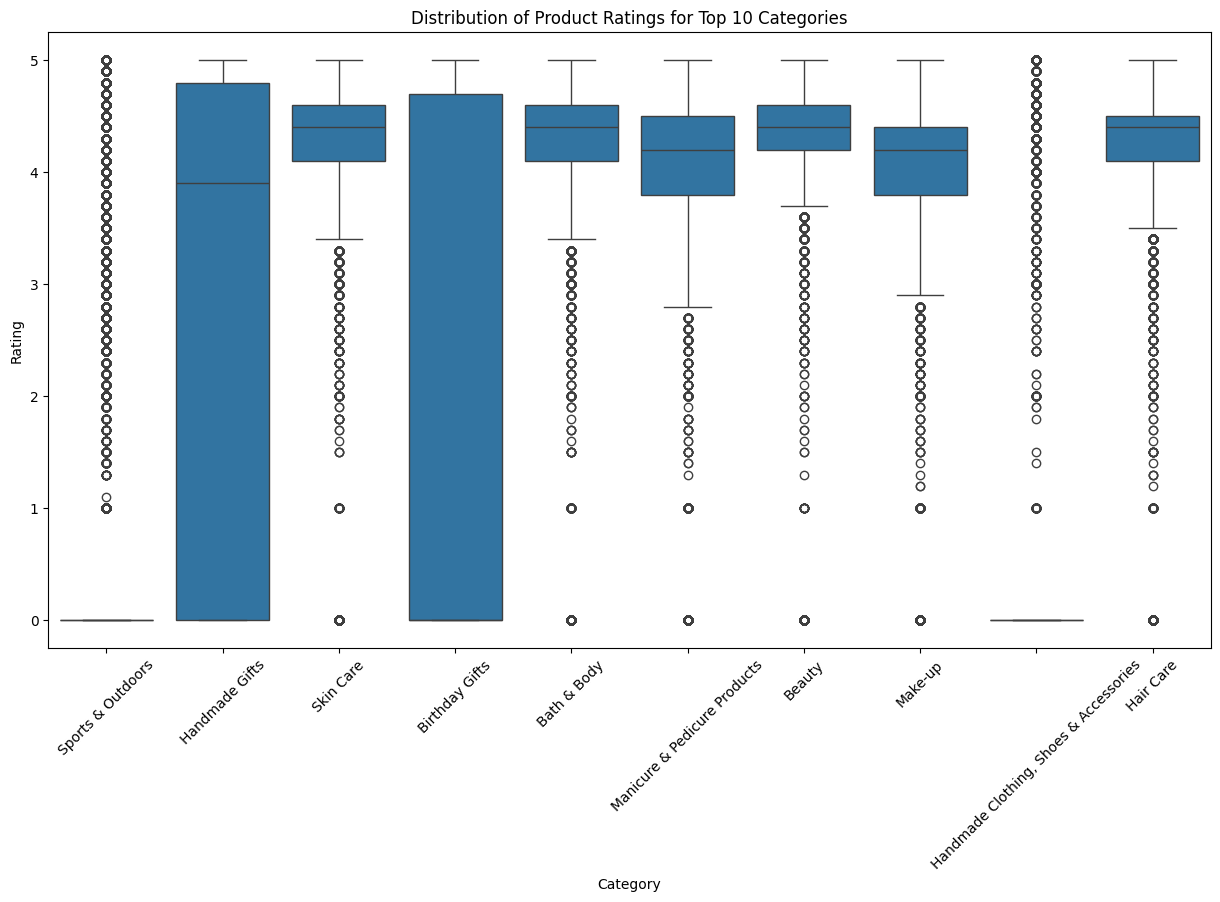

'Computer Memory'

In [10]:
# top 10 categories based on the number of entries
top_categories = df['category'].value_counts().head(10).index

filtered_df2 = df[df['category'].isin(top_categories)]

# Create side-by-side box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=filtered_df2, x='category', y='stars')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Distribution of Product Ratings for Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()


# max of median rating for each category
df.groupby('category')['stars'].median().idxmax()

## Part 3: Investigating the Interplay Between Product Prices and Ratings

### 3.1 Correlation Coefficient

In [11]:
# Pearson
pearson_corr = df['price'].corr(df['stars']) # no significant correlation between price and stars

# Spearman
spearman_corr = df['price'].corr(df['stars'], method="spearman")

print(pearson_corr)
print(spearman_corr)

-0.07767299878181444
-0.06679697280768455


### 3.2 Visualizations

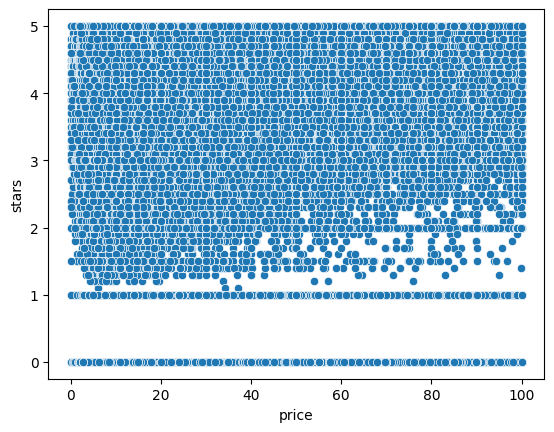

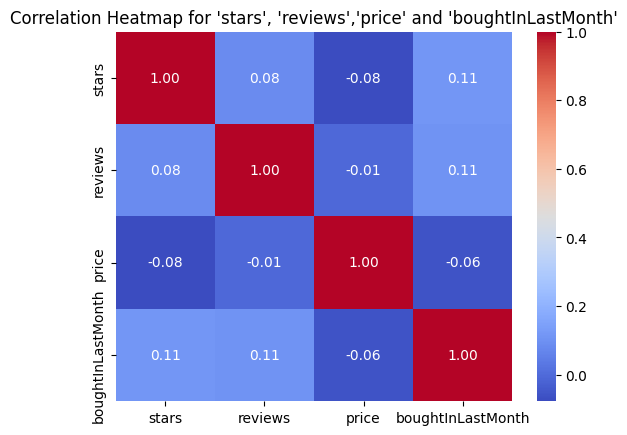

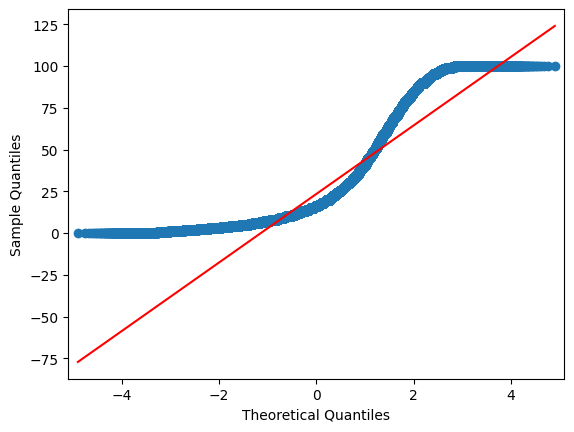

In [12]:
import statsmodels.api as sm

# scatter plot
sns.scatterplot(data=df, x='price', y='stars')
plt.show()


nums_cor = df[['stars', 'reviews', 'price', 'boughtInLastMonth']].corr()
# heatmap
sns.heatmap(nums_cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for 'stars', 'reviews','price' and 'boughtInLastMonth'")
plt.show()

# generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');
plt.show()

scatter plot shows that there are no ratings between 0 and 1, and also can observe that for more expensive products there is a slight decrease in the amount of not so high ratings 